In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [52]:
# Define MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [53]:
# Initialize model
input_size = X_train.shape[1]
mlp_model = MLP(input_size=input_size, hidden_size=32, output_size=2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.01)


In [54]:
# Training loop
epochs = 50
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = mlp_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    
    with torch.no_grad():
        y_pred = mlp_model(X_test_tensor).argmax(dim=1)
        accuracy = (y_pred == y_test_tensor).float().mean().item()
        accuracy_history.append(accuracy)

In [55]:
# Evaluate model
with torch.no_grad():
    y_pred = mlp_model(X_test_tensor).argmax(dim=1)
    accuracy = (y_pred == y_test_tensor).float().mean().item()
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8350
Epoch [50/50], Loss: 0.1747, Accuracy: 0.8350


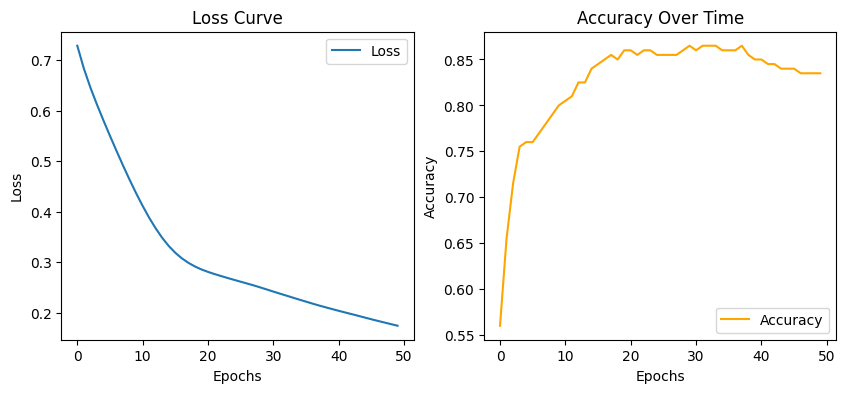

Final Test Accuracy: 0.8350


In [56]:
# Plot Loss Curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_history, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Over Time
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_history, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()

plt.show()

# Final Evaluation
print(f'Final Test Accuracy: {accuracy_history[-1]:.4f}')